Probability such that drawn ball is red from bag 2 0.44285714285714284
Probability such that transferred ball is black from bag 1 given drawn ball from bag 2 is red 0.5161290322580645


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


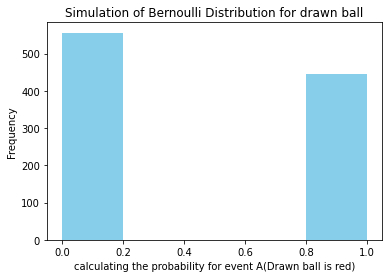


 Simulation P( calculating the probability for event A(Drawn ball is red) ) = 0.444000


 ACTUAL P( calculating the probability for event A(Drawn ball is red) ) = 0.442857


 Simulation P( Probability such that transferred ball is black from bag 1 given drawn ball from bag 2 is ) = 0.497000


 ACTUAL P( Probability such that transferred ball is black from bag 1 given drawn ball from bag 2 is ) = 0.516129



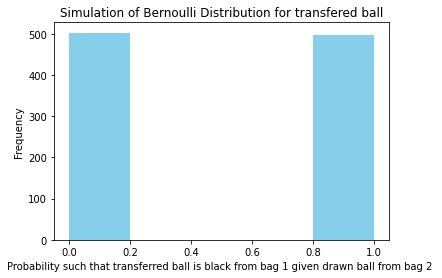

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import math
from scipy import stats
#calculating probability from bayes theoram with given 2 equally likely events C1 and c2 
def calcProb_Bayes(P_C1,P_C2,P_A_C1,P_A_C2):
   P_A=P_A_C1*P_C1+P_A_C2*P_C2
   return P_A
#Calculating conditional probalilty given some event has occured
def calcCond_Prob(P_C1,P_A_C1,P_A):
  P_C1_A=(P_A_C1*P_C1)/P_A
  return P_C1_A
# From our question data is given-
P_C1=4/7
P_C2=3/7
P_A_C1=4/10
P_A_C2=5/10
# calculating the probability for event A(Drawn ball is red)
print("Probability such that drawn ball is red from bag 2",calcProb_Bayes(P_C1,P_C2,P_A_C1,P_A_C2))
PA=calcProb_Bayes(P_C1,P_C2,P_A_C1,P_A_C2)
#Probability such that transferred ball is black from bag 1 given drawn ball from bag 2 is red"
print("Probability such that transferred ball is black from bag 1 given drawn ball from bag 2 is red",calcCond_Prob(P_C1,P_A_C1,PA))


def simulate_bayes_bernoulli():
    #Probability such that drawn ball is red from bag 2"
    P_A=calcProb_Bayes(P_C1,P_C2,P_A_C1,P_A_C2)
    P_drawnball = P_A
    P_transfer = calcCond_Prob(P_C1,P_A_C1,PA)
    
    sim_len = int(1e3)
    
    sim_bern1 = bernoulli.rvs(size=sim_len, p=P_drawnball)
    sim_bern2 = bernoulli.rvs(size=sim_len, p=P_transfer)
    
    fav_drawn = np.nonzero(sim_bern1 == 1)
    fav_transfer = np.nonzero(sim_bern2 == 1)
    
    p_sim_bern1 = len(fav_drawn[0])/sim_bern1.size
    p_sim_bern2 = len(fav_transfer[0])/sim_bern2.size
    
    plt.figure()
    plot(sim_bern1,
      'calculating the probability for event A(Drawn ball is red)',
      'Simulation of Bernoulli Distribution for drawn ball')
    print('\n Simulation P( calculating the probability for event A(Drawn ball is red) ) = %f\n' % p_sim_bern1)
    print('\n ACTUAL P( calculating the probability for event A(Drawn ball is red) ) = %f\n' % P_drawnball)
    print('\n Simulation P( Probability such that transferred ball is black from bag 1 given drawn ball from bag 2 is ) = %f\n' % p_sim_bern2)
    print('\n ACTUAL P( Probability such that transferred ball is black from bag 1 given drawn ball from bag 2 is ) = %f\n' % P_transfer)
    plt.figure()
    plot(sim_bern2, 
      'Probability such that transferred ball is black from bag 1 given drawn ball from bag 2 ',
      'Simulation of Bernoulli Distribution for transfered ball')

def plot(data_bern, xl, t):
    ax = sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={'linewidth': 25,'alpha':1})
    ax.set(xlabel=xl, ylabel='Frequency')
    ax.set(title=t)
    plt.show()


simulate_bayes_bernoulli()
